In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import koreanize_matplotlib 

주제: 온라인 학습 플랫폼 사용자 행동 패턴 분석

1. 이용자들 중 누가 서비스 구독을 연장할지 예측
2. 학습 습관, 선호도, 이용 형태 등 다양한 측면을 면밀히 분석

-학습패턴
-서비스 이용기간
-콘텐츠에 대한 반응
-얼마나 자주 서비스를 이용하는지
 
-서비스에 얼마나 만족하고 있는지
-어떤 요소가 구독 결정에 영향을 미치는지

In [4]:
raw=pd.read_csv('.\data\mini.csv')
raw=pd.DataFrame(raw)
raw_copy=pd.DataFrame(raw)

In [6]:
raw.info

<bound method DataFrame.info of        user_id  subscription_duration  recent_login_time  average_login_time  \
0     b919c29d                     13                 14           14.946163   
1     a0a60abb                     16                 18           18.453224   
2     b9f171ae                     22                  1           16.195228   
3     5dc0ba8b                      1                 19           17.628656   
4     65c83654                      4                  5           21.390656   
...        ...                    ...                ...                 ...   
9995  ae6b76bc                     22                 29           14.727623   
9996  24588752                     10                 11           19.374054   
9997  e4622a54                      7                 27           18.240978   
9998  e07fbad9                     11                  7           18.783800   
9999  e12dcb55                     10                  5           13.073230   

      a

In [195]:
raw.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,구분
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,3
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN,장기
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN,4696
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900,NaN
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435,NaN
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000,NaN
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000,NaN
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000,NaN


In [7]:
raw.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [50]:
raw=raw.set_index('user_id')

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,구분
user_id,,,,,,,,,,,,,,,
b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,2년
a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,2년
b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,2년
5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,None
65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,1년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1,2년
24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1,1년
e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1,1년


<Axes: xlabel='subscription_duration'>

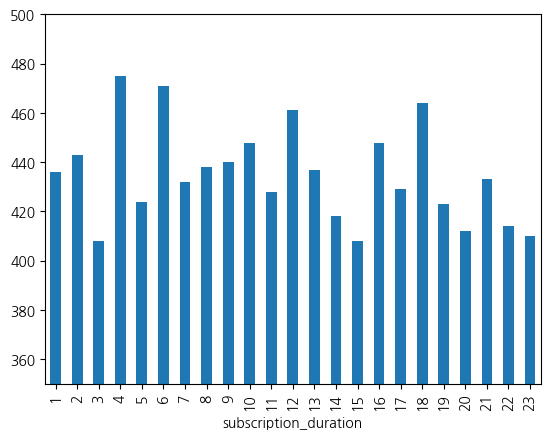

In [57]:
a=raw['subscription_duration'].value_counts()
a_sorted = a.sort_index()
plt.ylim(350, 500)
a_sorted.plot.bar()

#가입기간 별 사용자 수 ==> 시즌에 따른 패턴이 있어보임 1~12 cut해서 두개 살펴 볼 필요

<Axes: xlabel='recent_login_time'>

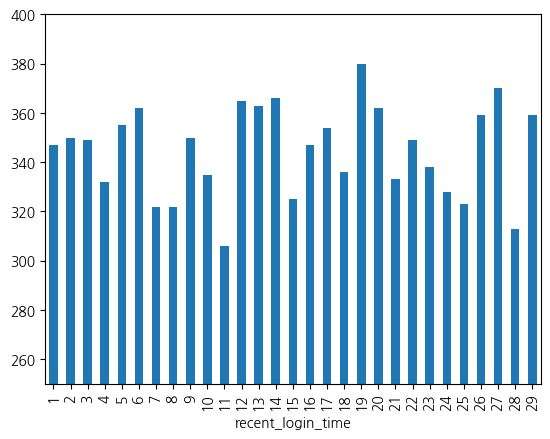

In [61]:
b=raw['recent_login_time'].value_counts()
b_sorted = b.sort_index()
plt.ylim(250, 400)
b_sorted.plot.bar()

# 사용자가 마지막으로 로그인한 시간 -> 1~29일 범위= 월중 마지막 로그인 날짜를 뜻하는 듯?

<Axes: ylabel='Frequency'>

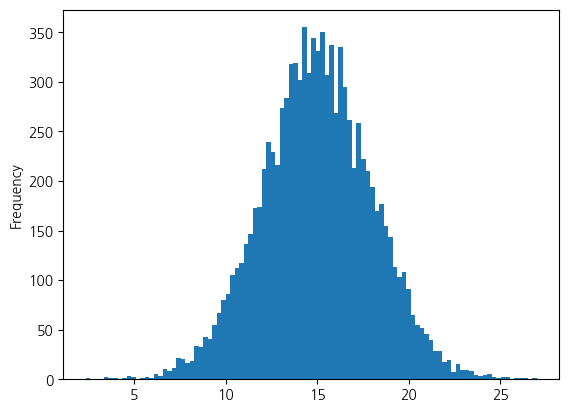

In [14]:
c=raw['average_login_time']
#c_sorted = c.sort_index()
#plt.ylim(250, 400)
#c_sorted.plot.bar()
c.plot.hist(bins=100)

# 사용자 평균 로그인한 일수

<Axes: ylabel='Frequency'>

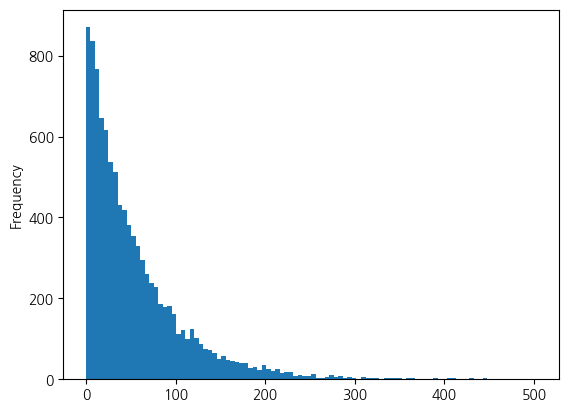

In [15]:
d=raw['average_time_per_learning_session']
#c_sorted = c.sort_index()
#plt.ylim(250, 400)
#c_sorted.plot.bar()
d.plot.hist(bins=100)

# 학습 세션에 소요된 평균 시간(분)  => 로그인 시간 대비 학습 세션 시간??

<Axes: xlabel='monthly_active_learning_days'>

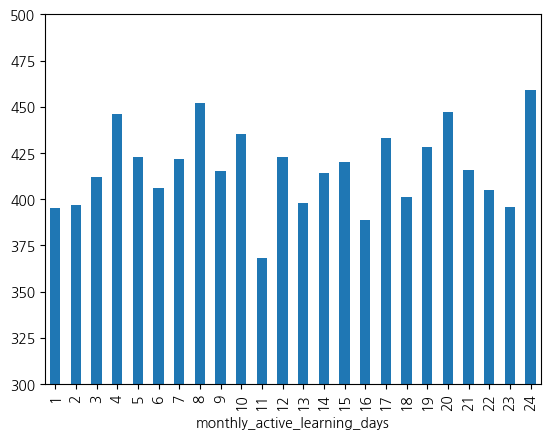

In [18]:
e=raw['monthly_active_learning_days'].value_counts()
e_sorted = e.sort_index()
plt.ylim(300, 500)
e_sorted.plot.bar()

#월간 활동적인 학습 일수

<Axes: xlabel='total_completed_courses'>

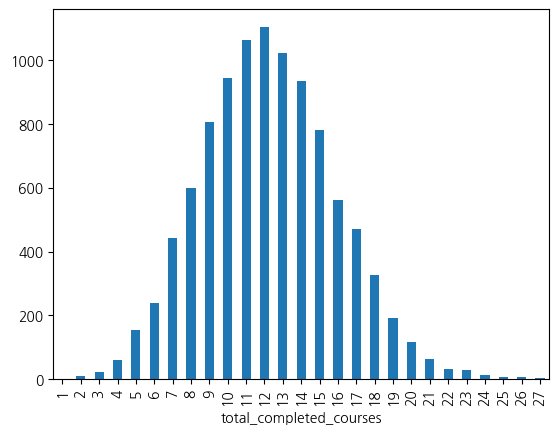

In [20]:
f=raw['total_completed_courses'].value_counts()
f_sorted = f.sort_index()
#plt.ylim(300, 500)
f_sorted.plot.bar()

# 완료한 총 코스 수  = 정규분포 12

<Axes: ylabel='Frequency'>

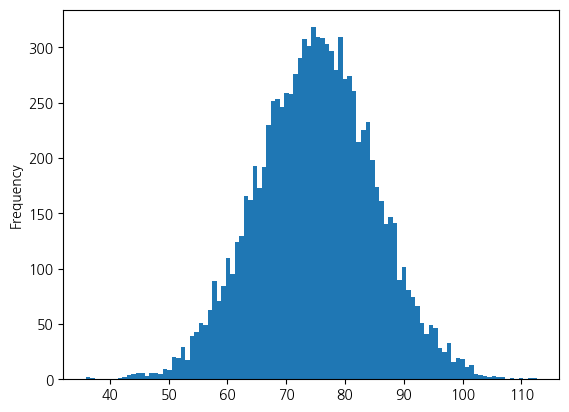

In [23]:
g=raw['recent_learning_achievement']
#g_sorted = g.sort_index()
#plt.ylim(300, 500)
g.plot.hist(bins=100)

# 최근 학습 성취도

<Axes: xlabel='abandoned_learning_sessions'>

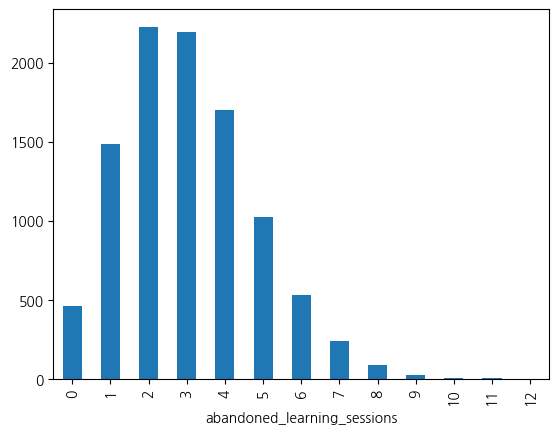

In [24]:
h=raw['abandoned_learning_sessions'].value_counts()
h_sorted = h.sort_index()
#plt.ylim(300, 500)
h_sorted.plot.bar()

# 중단된 학습 세션 수

<Axes: ylabel='count'>

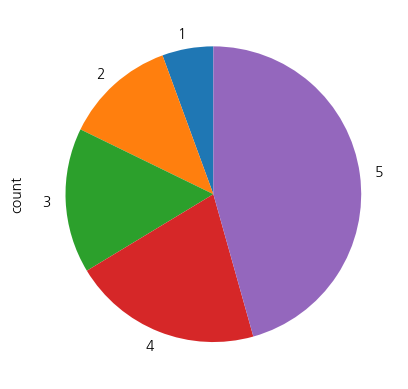

In [31]:
i=raw['community_engagement_level'].value_counts()
i_sorted = i.sort_index()
#plt.ylim(300, 500)
i_sorted.plot.pie(startangle=90)

#커뮤니티 참여도 = 50%이상 활발히 참여

<Axes: ylabel='count'>

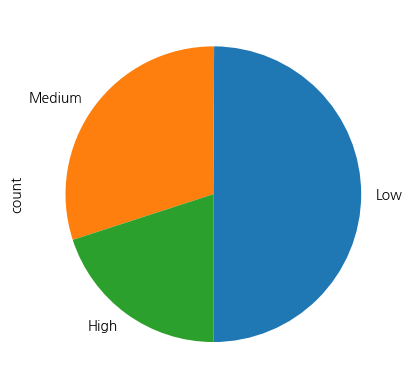

In [35]:
j=raw['preferred_difficulty_level'].value_counts()
#j_sorted = j.sort_index()
#plt.ylim(300, 500)
j.plot.pie(startangle=-90)

# 선호 난이도 => 50%이상 low

<Axes: ylabel='count'>

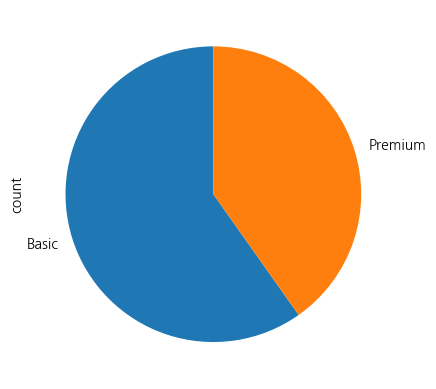

In [38]:
k=raw['subscription_type'].value_counts()
k_sorted = k.sort_index()
#plt.ylim(300, 500)
k_sorted.plot.pie(startangle=90)

# 구독 유형 = basic 60%정도

<Axes: xlabel='customer_inquiry_history'>

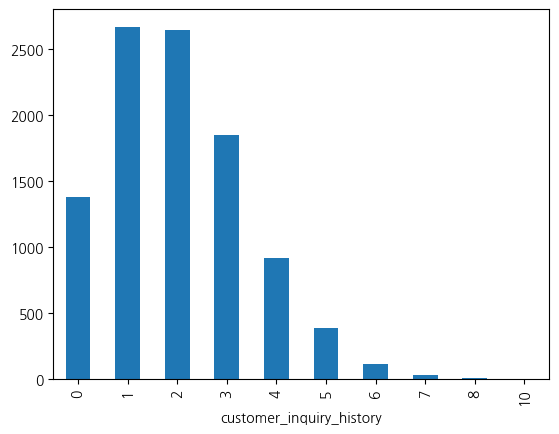

In [40]:
l=raw['customer_inquiry_history'].value_counts()
l_sorted = l.sort_index()
#plt.ylim(300, 500)
l_sorted.plot.bar()

# 고객문의 1~10점 척도 -낮은 편

<Axes: xlabel='payment_pattern'>

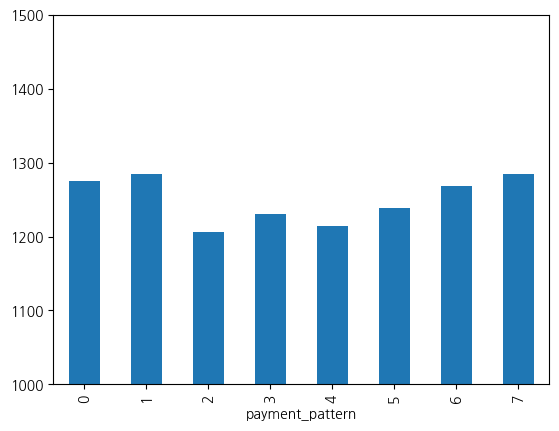

In [42]:
m=raw['payment_pattern'].value_counts()
m_sorted = m.sort_index()
plt.ylim(1000, 1500)
m_sorted.plot.bar()

<Axes: xlabel='preferred_difficulty_level', ylabel='total_completed_courses'>

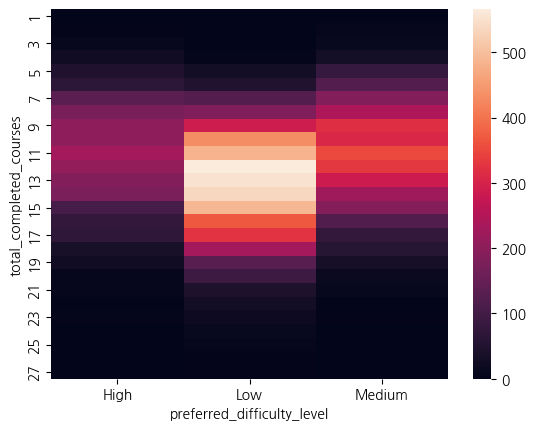

In [47]:
level_complete = pd.pivot_table(raw, values='user_id',   #values : 열에 들어 가는 부분
                       index=['preferred_difficulty_level'], #index : 행에 들어가는 부분
                       columns=['total_completed_courses'],  
                       aggfunc="count")
level_complete=level_complete.T.fillna(0)

sns.heatmap(level_complete)
# 선호하는 난이도 - 완료한 총 코스 수 X

<Axes: xlabel='total_completed_courses', ylabel='abandoned_learning_sessions'>

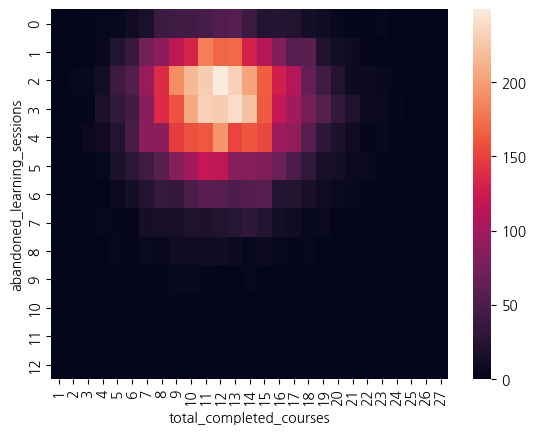

In [58]:
level_abandon = pd.pivot_table(raw, values='user_id',   #values : 열에 들어 가는 부분
                       index=['abandoned_learning_sessions'], #index : 행에 들어가는 부분
                       columns=['total_completed_courses'],  
                       aggfunc="count")
level_abandon=level_abandon.fillna(0)

sns.heatmap(level_abandon)
# 중단한 학습 세션 수 - 완료한 총 코스 수

<Axes: xlabel='community_engagement_level', ylabel='customer_inquiry_history'>

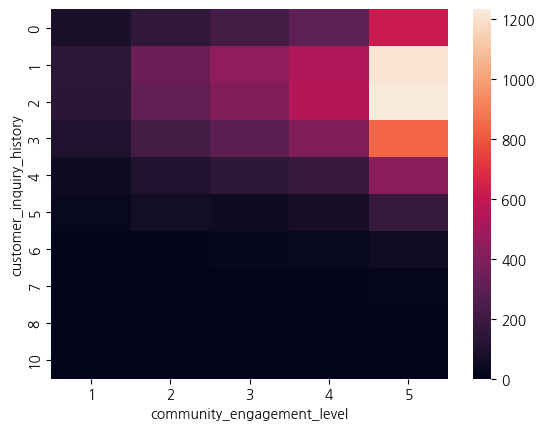

In [62]:
level_active= pd.pivot_table(raw, values='user_id',   #values : 열에 들어 가는 부분
                       index=['customer_inquiry_history'], #index : 행에 들어가는 부분
                       columns=['community_engagement_level'],  
                       aggfunc="count")
level_active=level_active.fillna(0)

sns.heatmap(level_active)
# 고겍문의 이력 - 커뮤니티 참여도  -> 커뮤니티에 참여하면 고객문의는 낮음